# Hierarchical , K Means and DBscan for Crime Data

# HClustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
crime = pd.read_csv("crime_data.csv")
crime   

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [2]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)  

In [3]:
df_norm = norm_func(crime.iloc[:,1:])
df_norm
  

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [4]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(crime.iloc[:,1:]))
data   

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


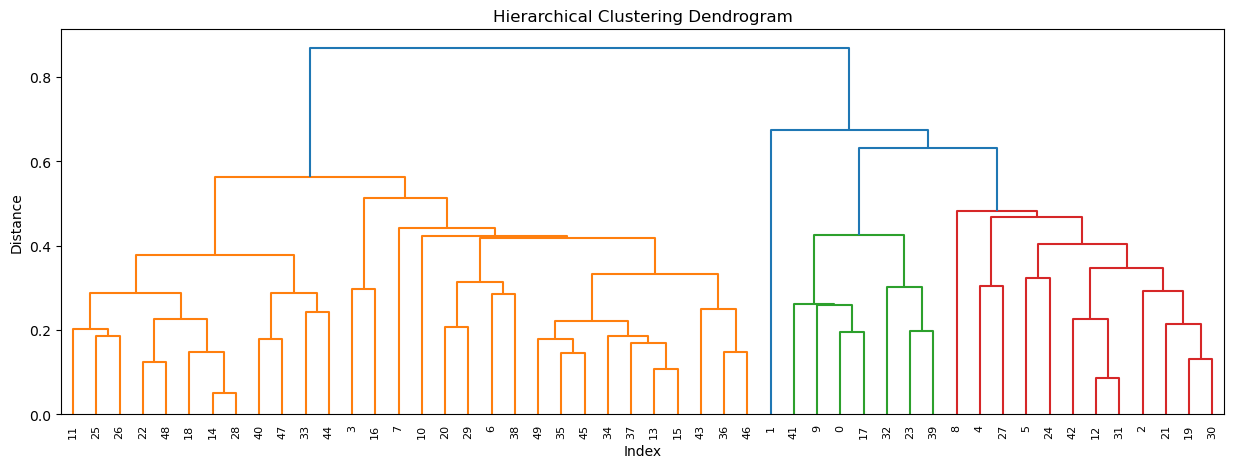

In [5]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [6]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [7]:
crime.iloc[:,1:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,6.055556,140.055556,71.333333,18.683333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,3.091667,76.000000,52.083333,11.833333,4.0


In [8]:
data = crime[(crime.clust==1)]
data   

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [9]:
data = crime[(crime.clust==0)]
data  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


In [10]:
data = crime[(crime.clust==3)]
data  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [11]:
data = crime[(crime.clust==2)]
data    

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crime_subset = pd.DataFrame(scaler.fit_transform(crime.iloc[:,1:7]))
crime_subset    

,0,1,2,3,4
0,1.255179,0.790787,-0.526195,-0.003451,0.820928
1,0.513019,1.118060,-1.224067,2.509424,0.208295
2,0.072361,1.493817,1.009122,1.053466,-0.404338
3,0.234708,0.233212,-1.084492,-0.186794,-1.016971
4,0.281093,1.275635,1.776781,2.088814,-0.404338
5,0.025976,0.402909,0.869548,1.883901,-0.404338
6,-1.040880,-0.736484,0.799761,-1.092723,-1.016971
7,-0.437875,0.815030,0.450825,-0.585834,-1.016971
8,1.765415,1.990786,1.009122,1.150530,-0.404338
9,2.229265,0.487757,-0.386621,0.492653,0.820928


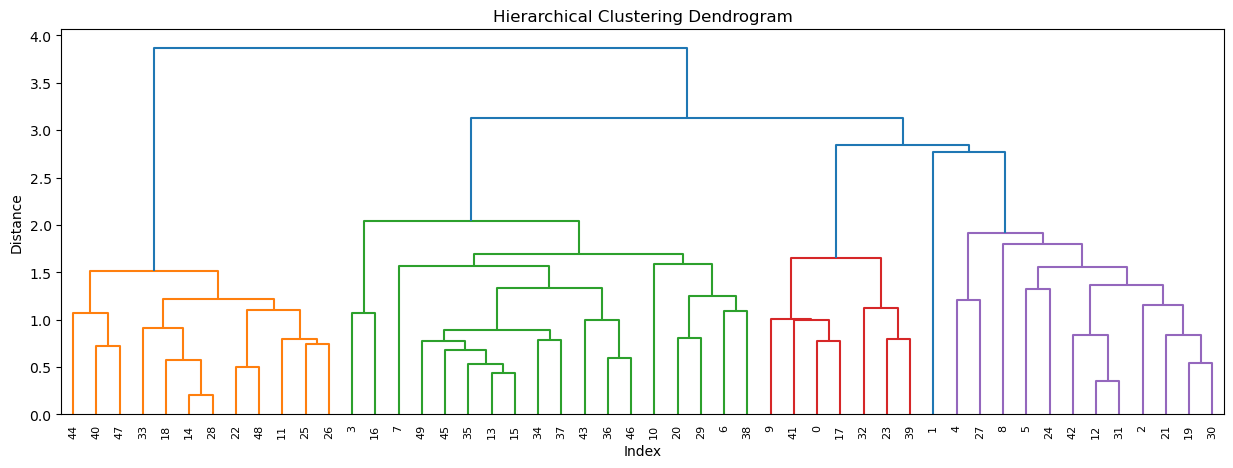

In [13]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(crime_subset, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()    

In [14]:
crime.iloc[:,1:].groupby(crime.clust).mean() 

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,6.055556,140.055556,71.333333,18.683333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,3.091667,76.000000,52.083333,11.833333,4.0


In [15]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(crime_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [16]:
data = crime[(crime.clust==0)]
data  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


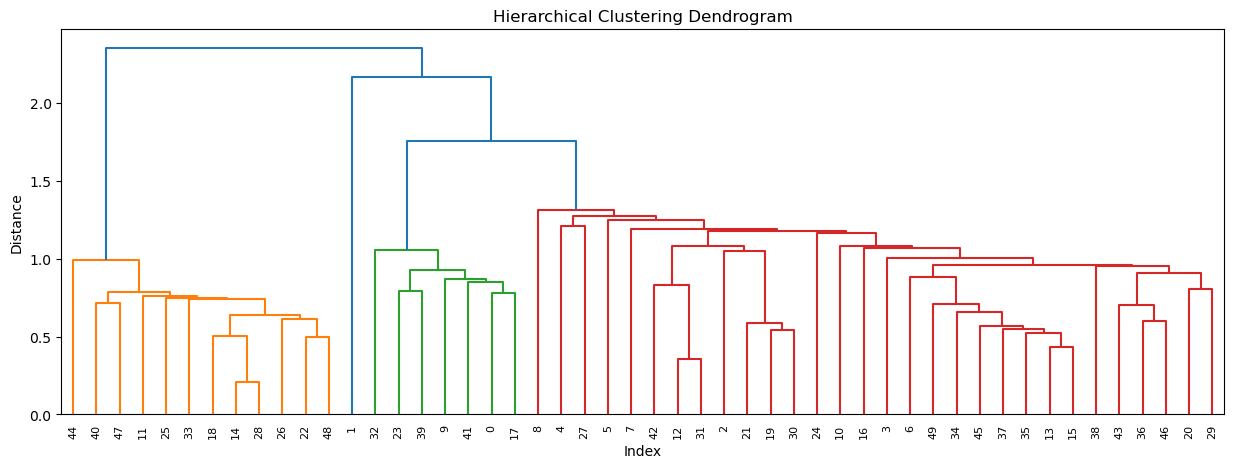

In [17]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(crime_subset, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()    

In [18]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='single',affinity = "euclidean").fit(crime_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,4
9,Georgia,17.4,211,60,25.8,1


In [19]:
data = crime[(crime.clust==2)]
data  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2


# KMeans Clustering

In [20]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [21]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X 

array([9.20150451e-01, 9.72497626e-01, 4.53618506e-01, 1.62983811e-02,
       7.98727227e-01, 1.22975001e-01, 6.39340228e-01, 3.98034022e-01,
       3.63099741e-02, 2.86621772e-01, 6.16489812e-01, 3.83285613e-01,
       6.50609220e-01, 4.50386319e-02, 1.16284722e-01, 7.55976697e-02,
       6.07449462e-01, 3.29015047e-01, 5.72654989e-01, 5.05981216e-01,
       9.97817800e-01, 5.89940204e-01, 9.05186697e-01, 3.13922551e-01,
       3.13180478e-01, 4.56092295e-01, 8.72599182e-01, 9.80925377e-01,
       2.55166539e-02, 9.80573466e-01, 2.73323008e-01, 3.67636252e-01,
       5.00842626e-01, 2.79758144e-01, 6.85105423e-02, 7.89939572e-01,
       4.08639037e-02, 3.19635229e-01, 7.30586053e-01, 1.74547494e-01,
       8.32209997e-01, 8.07054464e-02, 5.95006709e-01, 5.25577255e-01,
       1.69773754e-01, 6.82362897e-01, 9.25025060e-01, 7.38434390e-01,
       2.84702530e-01, 4.40041250e-02, 1.58268203e-01, 8.72557332e-01,
       5.59918025e-01, 5.06125297e-01, 7.30733980e-01, 1.04290403e-01,
      

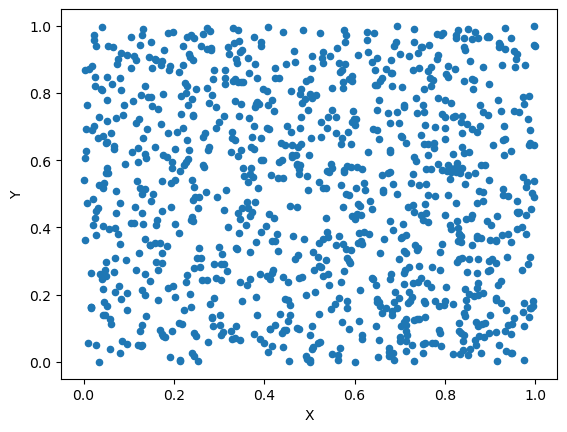

In [22]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)



<AxesSubplot:xlabel='X', ylabel='Y'>

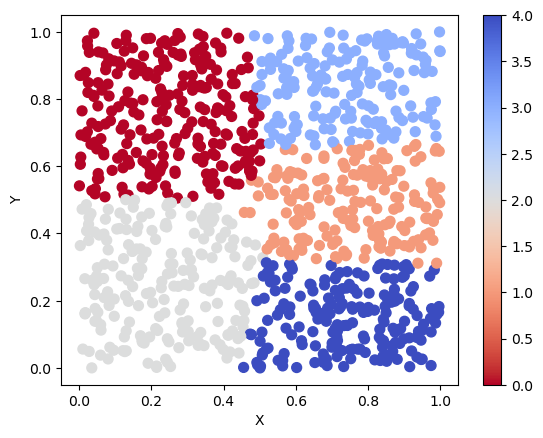

In [23]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r) 

In [24]:
crime = pd.read_csv("crime_data.csv")
crime 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [25]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)  

In [26]:
df_norm = norm_func(crime.iloc[:,1:])  

In [27]:
df_norm.head(10)  # Top 10 rows
 

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


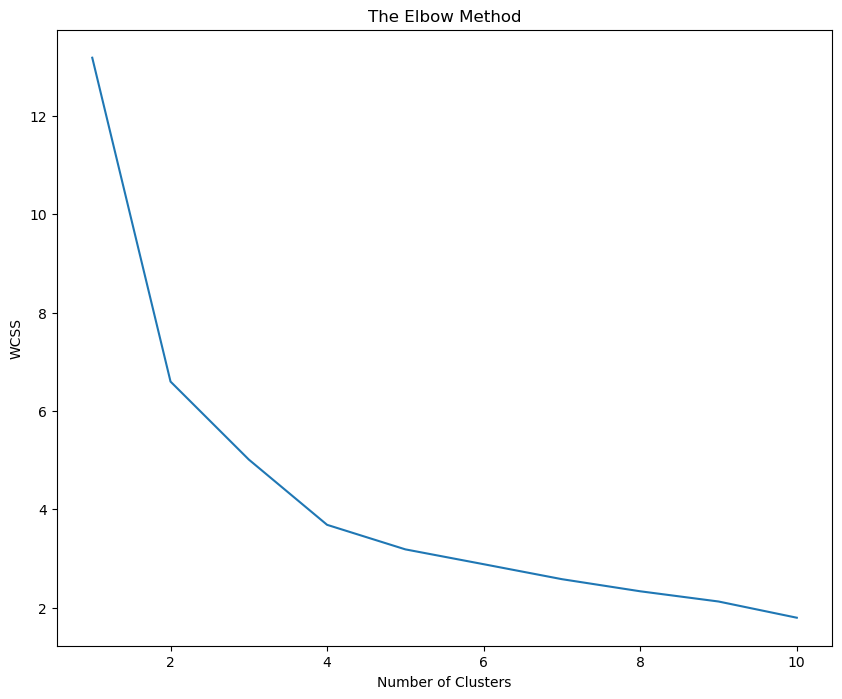

In [28]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [29]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)  

In [30]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([2, 3, 3, 0, 3, 3, 4, 0, 3, 2, 4, 1, 3, 0, 1, 0, 0, 2, 1, 3, 4, 3,
       1, 2, 0, 1, 0, 3, 1, 4, 3, 3, 2, 1, 0, 0, 0, 0, 4, 2, 1, 2, 3, 4,
       1, 0, 0, 1, 1, 0])

In [31]:
y_kmeans 

array([2, 3, 3, 0, 3, 3, 4, 0, 3, 2, 4, 1, 3, 0, 1, 0, 0, 2, 1, 3, 4, 3,
       1, 2, 0, 1, 0, 3, 1, 4, 3, 3, 2, 1, 0, 0, 0, 0, 4, 2, 1, 2, 3, 4,
       1, 0, 0, 1, 1, 0])

In [32]:
clf.cluster_centers_ 

array([[0.36187608, 0.34564579, 0.5653753 , 0.33444075],
       [0.13143483, 0.09806974, 0.32511556, 0.10617806],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.22289157, 0.27853881, 0.87288136, 0.23169681]])

In [33]:
clf.inertia_

3.1999182085623383

In [34]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
crime['clust']=md # creating a  new column and assigning it to new column 
crime 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,2


In [35]:
crime.iloc[:,1:7].groupby(crime.clust).mean() 

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,6.807143,145.928571,65.357143,20.242857,0.0
1,2.981818,73.636364,51.181818,11.409091,1.0
2,14.671429,251.285714,54.285714,21.685714,2.0
3,10.966667,264.000000,76.500000,33.608333,3.0
4,4.500000,126.333333,83.500000,16.266667,4.0


In [36]:
plt.style.use(['classic']) 
print(plt.style.available)   

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

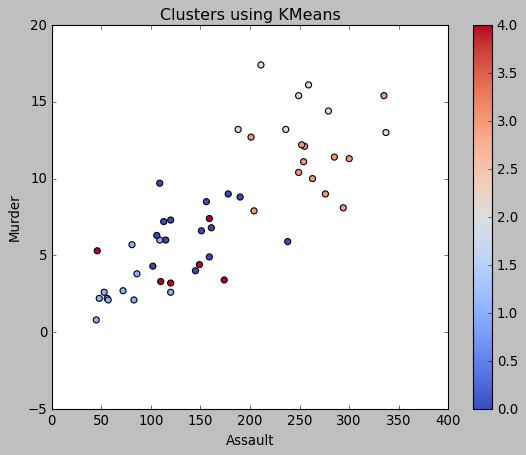

In [37]:
crime.plot(x="Assault",y ="Murder",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

In [38]:
WCSS  

[13.184122550256443,
 6.596893867946198,
 5.010878493006418,
 3.6834561535859143,
 3.1842618139677232,
 2.882595496751575,
 2.5779994984512586,
 2.3317838354272507,
 2.1240497245597134,
 1.794135769846461]

# DBSCAN Model

In [39]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    

In [40]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("crime_data.csv");

print(df.head())
df  

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [41]:
print(df.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [42]:
df1 = df.drop(['Names'],axis=1)   

KeyError: "['Names'] not found in axis"

In [ ]:
array=df1.values
array  

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X   

In [ ]:
dbscan = DBSCAN(eps=0.475, min_samples=5)
dbscan.fit(X)                      

In [ ]:
dbscan.labels_   

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])   

In [51]:
cl
pd.set_option("display.max_rows", None)  

NameError: name 'cl' is not defined

In [48]:
df1 = pd.concat([df,cl],axis=1)  
df1    

NameError: name 'cl' is not defined

In [49]:
import matplotlib.pyplot as plt
plt.style.use('classic')   

In [50]:
df1.plot(x="UrbanPop",y ="Rape",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')      

NameError: name 'df1' is not defined

In [93]:
dl = dbscan.labels_     

In [94]:
import sklearn

In [95]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(X)  

In [96]:
y_kmeans 

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [97]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

,Kcluster
0,1
1,1
2,1
3,2
4,1
5,1
6,2
7,2
8,1
9,1


In [98]:
df2 = pd.concat([df1,cl1],axis=1) 
df2 

,Names,Murder,Assault,UrbanPop,Rape,cluster,Kcluster
0,Alabama,13.2,236,58,21.2,-1,1
1,Alaska,10.0,263,48,44.5,-1,1
2,Arizona,8.1,294,80,31.0,-1,1
3,Arkansas,8.8,190,50,19.5,-1,2
4,California,9.0,276,91,40.6,-1,1
5,Colorado,7.9,204,78,38.7,-1,1
6,Connecticut,3.3,110,77,11.1,-1,2
7,Delaware,5.9,238,72,15.8,-1,2
8,Florida,15.4,335,80,31.9,-1,1
9,Georgia,17.4,211,60,25.8,-1,1


Text(0.5, 1.0, 'Clusters using KMeans')

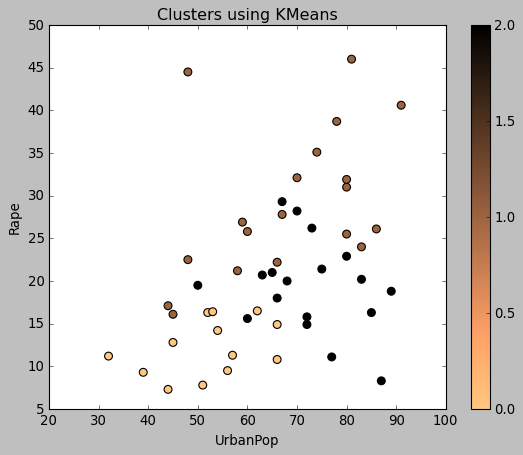

In [99]:
df2.plot(x="UrbanPop",y ="Rape",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')   

In [100]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.3095091512791688

In [101]:
from sklearn.neighbors import NearestNeighbors  

In [102]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)  

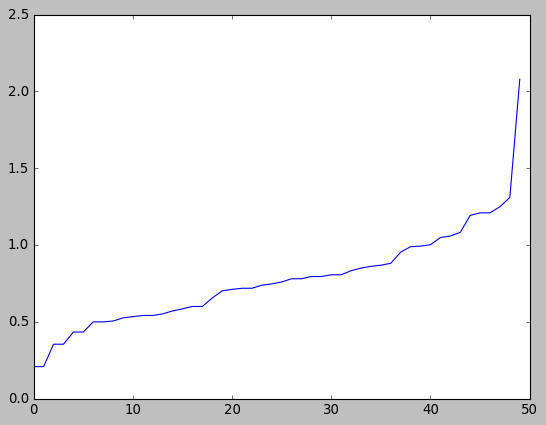

In [103]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  